In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,NaN,0.47,0.13,NaN,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	222
float64		column 2	74
float64		column 3	185
float64		column 4	0
float64		column 5	37
float64		column 6	0
float64		column 7	37
float64		column 8	37


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1262.000000,1410.000000,1299.000000,1484.000000,1447.000000,1484.000000,1447.000000,1447.000000
mean,0.502163,0.501121,0.499169,0.261186,0.504838,0.007500,0.500415,0.276296
std,0.136388,0.122751,0.086323,0.137098,0.048960,0.075683,0.056880,0.107087
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.450000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

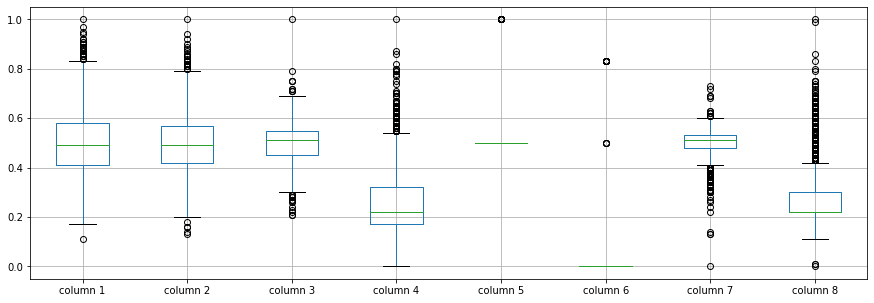

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.502163
column 2    0.501121
column 3    0.499169
column 4    0.261186
column 5    0.504838
column 6    0.007500
column 7    0.500415
column 8    0.276296
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.581827,-0.162420,0.155012,0.058838,-0.002337,0.055738,-0.129443
column 2,0.581827,1.000000,-0.267780,0.150859,0.081967,-0.000579,0.097315,-0.085299
column 3,-0.162420,-0.267780,1.000000,0.054270,-0.017142,0.013765,-0.160835,-0.001548
column 4,0.155012,0.150859,0.054270,1.000000,-0.005510,-0.009040,-0.094792,-0.054544
column 5,0.058838,0.081967,-0.017142,-0.005510,1.000000,-0.009924,0.043116,0.007598
column 6,-0.002337,-0.000579,0.013765,-0.009040,-0.009924,1.000000,0.020575,-0.036006
column 7,0.055738,0.097315,-0.160835,-0.094792,0.043116,0.020575,1.000000,0.087522
column 8,-0.129443,-0.085299,-0.001548,-0.054544,0.007598,-0.036006,0.087522,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+73,8+73+73,8+73+73+73,8+73+73+73+73,8+73+73+73+73+73,8+73+73+73+73+73+73,8+73+73+73+73+73,8+73+73+73+73,8+73+73+73,8+73+73,8+73,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.6672227447447567
Epoch: 1 , loss: 2.2613982350929924
Epoch: 2 , loss: 2.0953605809937352
Epoch: 3 , loss: 1.9717076926127723
Epoch: 4 , loss: 1.847476399463156
Epoch: 5 , loss: 1.7737828817056573
Epoch: 6 , loss: 1.700656235218048
Epoch: 7 , loss: 1.6214917664942534
Epoch: 8 , loss: 1.5417724627515543
Epoch: 9 , loss: 1.5095374752645907
Epoch: 10 , loss: 1.4558197868906932
Epoch: 11 , loss: 1.396313787802406
Epoch: 12 , loss: 1.3749846388464388
Epoch: 13 , loss: 1.3261798186146694
Epoch: 14 , loss: 1.3032309283380923
Epoch: 15 , loss: 1.28106847340646
Epoch: 16 , loss: 1.2452297599419304
Epoch: 17 , loss: 1.2359853918137758
Epoch: 18 , loss: 1.1956839658643887
Epoch: 19 , loss: 1.1620873316474583
Epoch: 20 , loss: 1.1626062749520591
Epoch: 21 , loss: 1.140915004455525
Epoch: 22 , loss: 1.1409841458434644
Epoch: 23 , loss: 1.1137662141219429
Epoch: 24 , loss: 1.1047012708757236
Epoch: 25 , loss: 1.0959

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,-0.166935,0.0,0.0,-0.043937,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1480,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1481,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1482,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4.20542698040655, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.08966003097085641

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.443065,0.47,0.13,0.456063,0.0,0.48,0.22
1,0.43,0.670000,0.48,0.27,0.500000,0.0,0.53,0.22
2,0.64,0.620000,0.49,0.15,0.500000,0.0,0.53,0.22
3,0.58,0.440000,0.57,0.13,0.500000,0.0,0.54,0.22
4,0.42,0.440000,0.48,0.54,0.500000,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.630000,0.47,0.18,0.500000,0.0,0.50,0.22
1480,0.35,0.290000,0.46,0.14,0.500000,0.0,0.54,0.66
1481,0.41,0.470000,0.50,0.14,0.500000,0.0,0.53,0.37
1482,0.51,0.450000,0.62,0.25,0.500000,0.0,0.59,0.22


In [21]:
imputations[-1].to_excel("Yeast_AG_5(imp).xlsx", index=False, header=False)